In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import pandas as pd 


In [ ]:
data=pd.read_csv("housing.csv")

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
#drop the non-null values
data.dropna(inplace=True)#saving the null values

In [ ]:
#comfirming for null values only
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
from posixpath import split
#splitting the data into training and testing data by splitting into x and y data
from sklearn.model_selection import train_test_split
x =data.drop(['median_house_value'], axis=1)
y =data['median_house_value']


In [ ]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [ ]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [ ]:
#splitting the x and y with a test size of 0.2
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [ ]:
#joining the x and y data to analyze correlations 
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
11433,-117.96,33.65,23.0,5379.0,684.0,1826.0,555.0,7.0151,<1H OCEAN,350600.0
8467,-118.34,33.91,12.0,9975.0,3638.0,7429.0,3405.0,2.6689,<1H OCEAN,192300.0
15200,-117.11,32.90,16.0,2043.0,388.0,705.0,352.0,4.4766,<1H OCEAN,161500.0
13366,-117.63,33.94,36.0,447.0,95.0,2886.0,85.0,4.2578,INLAND,183300.0
17284,-119.74,34.41,30.0,2365.0,417.0,1053.0,409.0,5.5959,NEAR OCEAN,346200.0
...,...,...,...,...,...,...,...,...,...,...
17099,-122.24,37.46,36.0,4686.0,781.0,2254.0,845.0,6.1043,NEAR OCEAN,343500.0
3943,-118.61,34.21,34.0,3494.0,557.0,1861.0,576.0,5.6407,<1H OCEAN,251500.0
4426,-118.25,34.07,18.0,4297.0,1420.0,4332.0,1286.0,2.2545,<1H OCEAN,192500.0
19338,-122.82,38.53,27.0,1823.0,360.0,907.0,317.0,3.2760,<1H OCEAN,172900.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

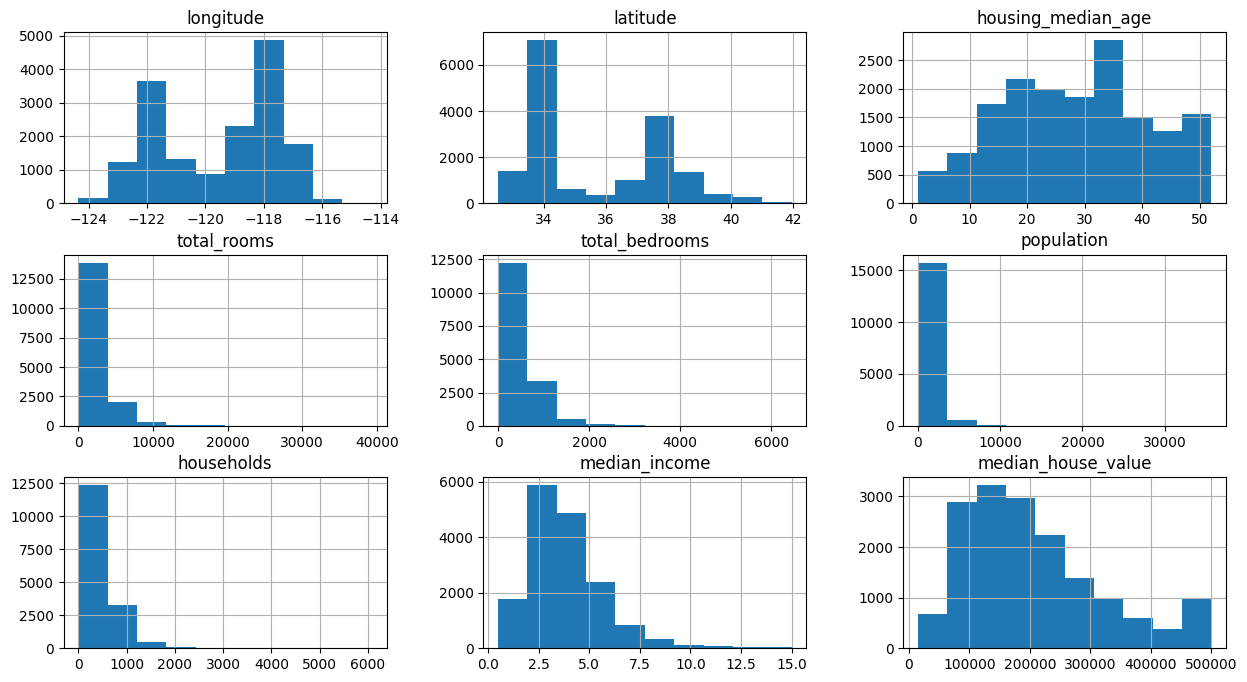

In [ ]:
##plotting a histogram from the data
train_data.hist(figsize=(15,8)) #figsize is to define the size of the histogram

<ipython-input-215-b01bb7a89943>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")


<Axes: >

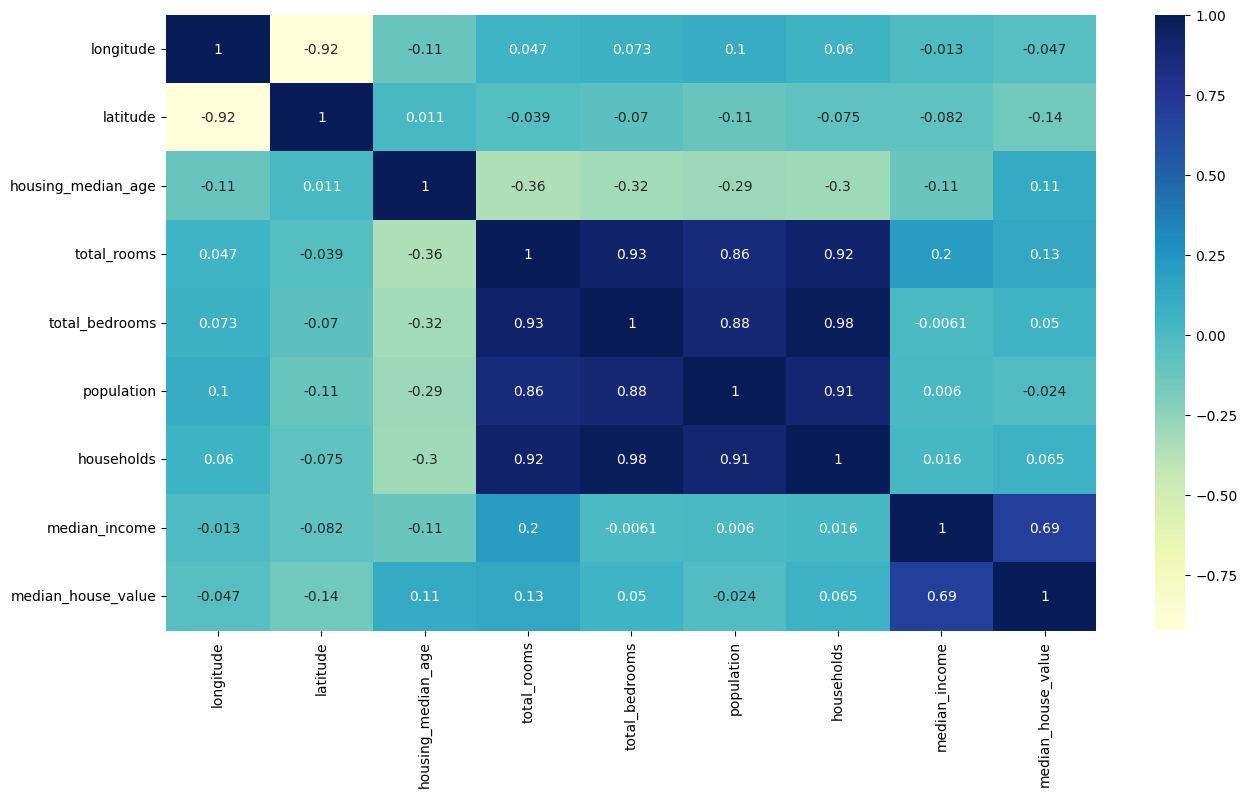

In [ ]:
#showing the correlation value 
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [ ]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

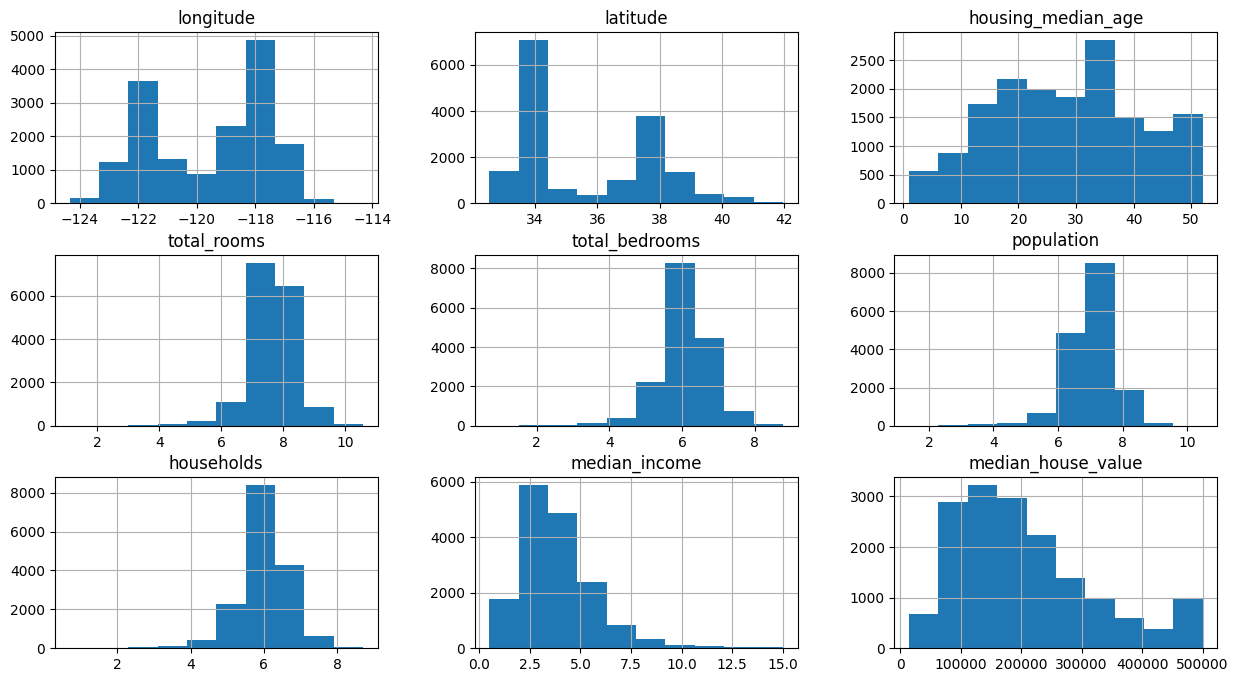

In [ ]:
train_data.hist(figsize=(15,8))

In [ ]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
11433,-117.96,33.65,23.0,8.590444,6.529419,7.510431,6.320768,7.0151,350600.0,1,0,0,0,0
8467,-118.34,33.91,12.0,9.207937,8.199464,8.913281,8.133294,2.6689,192300.0,1,0,0,0,0
15200,-117.11,32.90,16.0,7.622664,5.963579,6.559615,5.866468,4.4766,161500.0,1,0,0,0,0
13366,-117.63,33.94,36.0,6.104793,4.564348,7.967973,4.454347,4.2578,183300.0,0,1,0,0,0
17284,-119.74,34.41,30.0,7.768956,6.035481,6.960348,6.016157,5.5959,346200.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17099,-122.24,37.46,36.0,8.452548,6.661855,7.720905,6.740519,6.1043,343500.0,0,0,0,0,1
3943,-118.61,34.21,34.0,8.159089,6.324359,7.529406,6.357842,5.6407,251500.0,1,0,0,0,0
4426,-118.25,34.07,18.0,8.365905,7.259116,8.374015,7.160069,2.2545,192500.0,1,0,0,0,0
19338,-122.82,38.53,27.0,7.508787,5.888878,6.811244,5.762051,3.2760,172900.0,1,0,0,0,0


<Axes: >

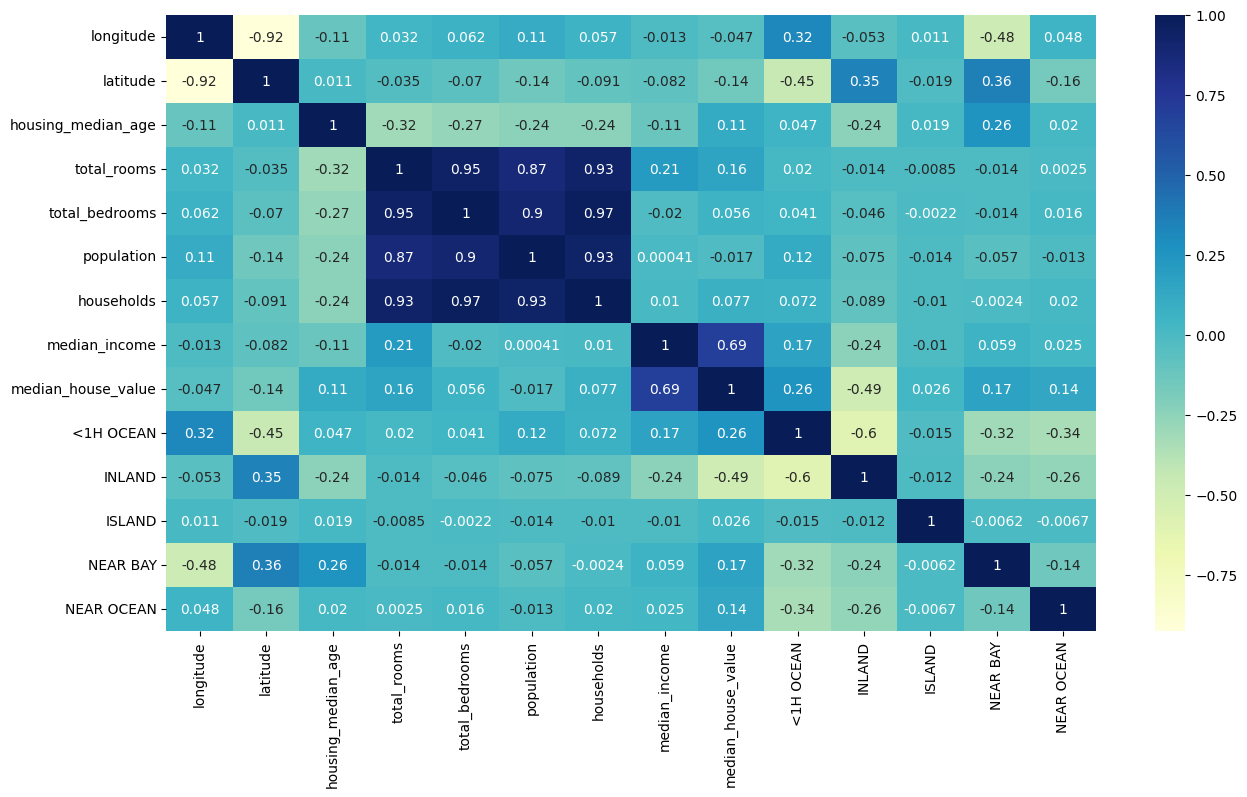

In [ ]:
#how features correlate with inland variables 
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

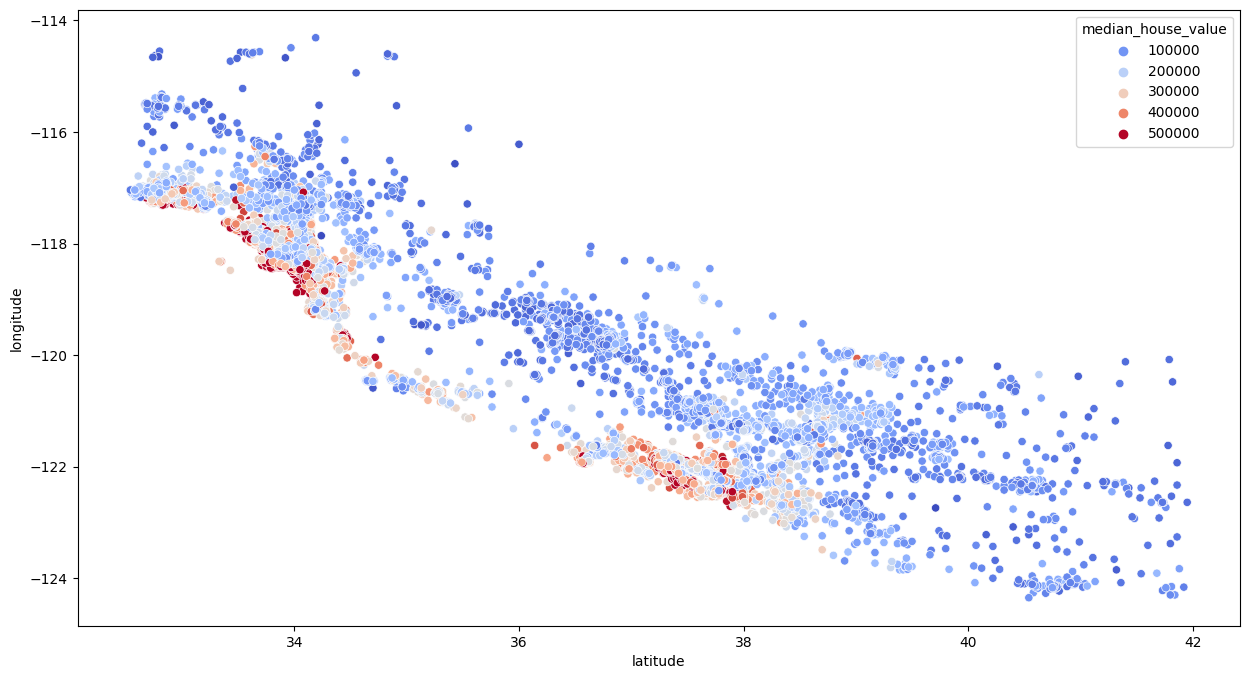

In [ ]:
#how position of individual blocks influences the pricing

plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [ ]:
#bedroom ratio per household
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

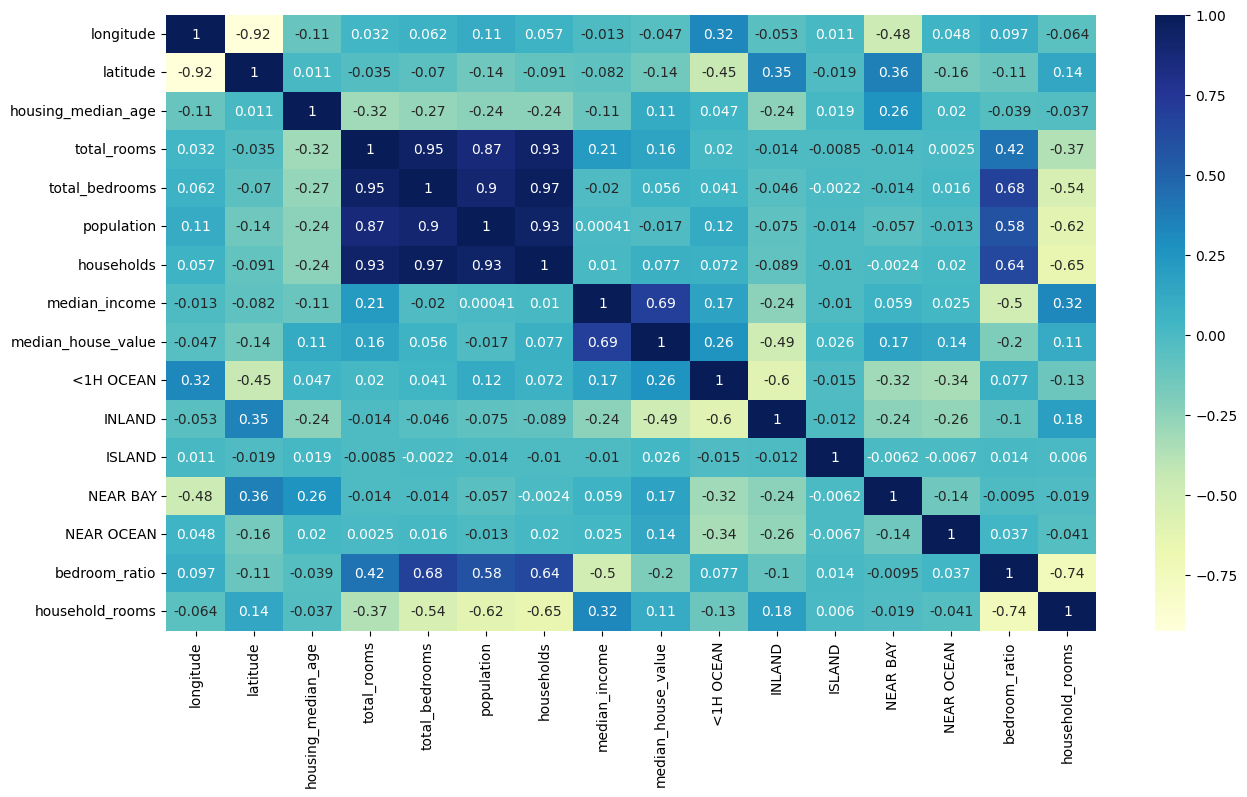

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [ ]:

#training a simple linear regression
from sklearn.linear_model import LinearRegression #importing regrassion value


X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']


reg = LinearRegression()

reg.fit(X_train, y_train)


LinearRegression()

In [ ]:
LinearRegression()

LinearRegression()

In [ ]:
 # Scale data
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']


In [ ]:
X_test, y_test = test_data.drop(['median_house_value'] , axis=1), test_data['median_house_value']

In [ ]:
#combining  different models by finding the optimal model
from sklearn.ensemble import RandomForestRegressor
Forest = RandomForestRegressor()
Forest.fit(X_train, y_train)

In [ ]:
RandomForestRegressor()

In [ ]:
Forest.score(X_train, y_train) #evaluating the model

0.9745422304367545

In [ ]:
#using the grid search with crossvalidation to train data and testing the data by evaluating its parameters

from sklearn.model_selection import GridSearchCV

Forest=RandomForestRegressor()

param_grid = {
     "n_estimators":[100,200,300],
     "max_faetures":[2,4],
     "min_samples_split":[None,4,8]
 }
grid_search = GridSearchCV(Forest, param_grid, cv=5,
                            scoring  = "neg_mean_squared_error",
                            return_train_score=True)

grid_search.fit(X_train, y_train)

In [ ]:
GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid= { 'max_depth':[None,4,8], 'min_sample_split': [2,4],
                         'n_estimator':[100, 200, 300] },
                         return_train_score=True, scoring='neg_mean_squared_error')

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_sample_split': [2, 4],
                         'n_estimator': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
RandomForestRegressor(n_estimators=200)